#Table of Contents
* &nbsp;
	* [Pole-zero locations and transfer functions behavior](#Pole-zero-locations-and-transfer-functions-behavior)
		* [Analysis of no-pole transfer functions](#Analysis-of-no-pole-transfer-functions)
		* [Analysis of all-poles transfer functions](#Analysis-of-all-poles-transfer-functions)
		* [General transfer functions](#General-transfer-functions)
		* [Appendix -- listing of the class ZerosPolesPlay](#Appendix----listing-of-the-class-ZerosPolesPlay)


In [1]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');

In [18]:
eqLabelWithNumbers=0
%run nbinit.ipy
js_addon()

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Loading customized Javascript for LaTeX typesetting
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
Overriding run-range javascript function


## Pole-zero locations and transfer functions behavior

In [52]:
from zerospolesdisplay import ZerosPolesDisplay

Let  $H(z)$  be a rational fraction
$$
H(z) = \frac{N(z)}{D(z)},
$$
where both $N(z)$ and $D(z)$ are polynomials in $z$, with $z\in\mathbb{C}$. The roots of both polynomials are very important in the behavior of  $H(z)$. 
\begin{definition} The roots of the numerator $N(z)$ are called the **zeros** of the transfer function.  The roots of the denominator $N(z)$ are called the **poles** of the transfer function.  
\end{definition}
Note that poles can occur at $z=\infty$. Recall that for $z=\exp({j2\pi f})$, the Z-transform reduces to the Fourier transform:
$$
H(z=e^{j2\pi f})=H(f).
$$

\begin{example}
- The rational fraction
$$
H(z)= \frac{1}{1-az^{-1}}
$$
has a pole for $z=a$ and a zero for $z=0$.
- The rational fraction
$$
H(z)= \frac{1-cz^{-1}}{(1-az^{-1})(1-bz^{-1})}
$$
has two poles for $z=a$ and $z=b$ and two zeros, for $z=0$ and $z=c$.
- The rational fraction
$$
H(z)= \frac{1-z^{-N}}{1-z^{-1}}
$$
has $N-1$ zeros of the form $z=\exp(j2\pi k/N)$, for $k=1..N$. Actually there are $N$ roots for the numerator and one root for the denominator, but the common root $z=1$ cancels.
\end{example}

\begin{exercise}
Give the difference equations corresponding to the previous examples, and compute the inverse Z-transforms (impulse responses). In particular, show that for the last transfer function, the impulse response is $\mathrm{rect}_N(n)$. 
\end{exercise}

\begin{prop} For any polynomial with real coefficients, the roots are either reals or appear by complex conjugate pairs. 
\end{prop}
\begin{proof} Let $$P(z) = \sum_{k=0}^{L-1} p_k z^k.$$ If $z_0=\rho e^{j\theta} $ is a root of the polynom, then $$P(z_0) = \sum_{k=0}^{L-1} p_k \rho^k e^{-jk\theta},$$ and $$P(z_0^*) = \sum_{k=0}^{L-1} p_k \rho^k e^{jk\theta}.$$ Putting $e^{-j(L-1)\theta}$ in factor, we get 
$$P(z_0^*) = e^{-j(L-1)\theta} \sum_{k=0}^{L-1} p_k \rho^k e^{jk\theta}= e^{-j(L-1)\theta} P(z_0)=0.$$ 
\end{proof}

This shows that if the coefficients of the transfer function are real, then the zeros and poles are either real or appear in complex conjugate pairs. This is usually the case, since these coefficients are the coefficients of the underlying difference  equation. For real filters, the difference equation has obviously real coefficients. 

\begin{textboxa} For real filters, the zeros and poles are either real or appear in complex conjugate pairs.
\end{textboxa}



### Analysis of no-pole transfer functions

Suppose that a transfer function $H(z)=N(z)$ has two conjugated zeros $z_0$ and $z_0^*$ of the form $\rho e^{\pm j\theta}$. That is, $N(z)$ has the form
\begin{align}
N(z) & = (z-z_0)(z-z_0^*) = (z-\rho e^{ j\theta})(z-\rho e^{- j\theta}) \\
& = z^2 -2\rho\cos(\theta)z + \rho^2 
\end{align}
For a single zero, we see that the transfer function, with $z=e^{j2\pi f}$, is minimum when $|z-z_0|$ is minimum. Since  $|z-z_0|$ can be interpreted as the distance between points $z$ and $z_0$ in the complex plane, this happens when $z$ and $z_0$ have the same phase (frequency). When $z_0$ has a modulus one, that is is situated on the unit circle, then $z-z_0$ will be null for this frequency and the function transfer will present a null.



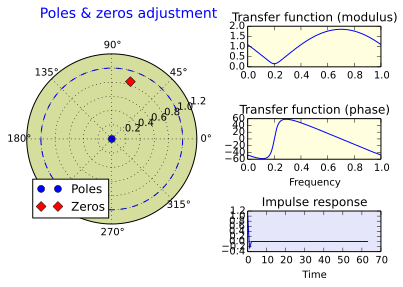

In [27]:
poles=np.array([0])
zeros=np.array([0.85*np.exp(1j*2*pi*0.2)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a single zero", label="fig:singlezero")

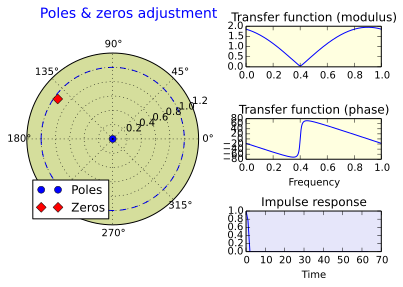

In [26]:
poles=np.array([0])
zeros=np.array([0.95*np.exp(1j*2*pi*0.4)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a single zero", label="fig:singlezero_2")

With two or more zeros, the same kind of observations holds. However,because of the interactions berween the zeros, the minimum no more strictly occur for the frequencies of the zeros but for some close frequencies. 

This is illustrated now in the case of two complex-conjugated zeros (which corresponds to a transfer function with real coefficients).

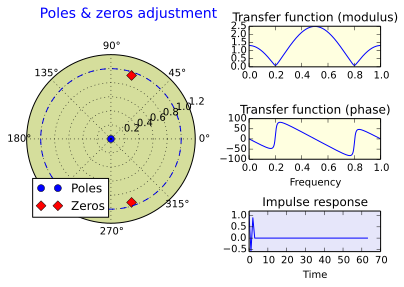

In [36]:
poles=np.array([0])
zeros=np.array([0.95*np.exp(1j*2*pi*0.2), 0.95*np.exp(-1j*2*pi*0.2)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a double zero", label="fig:doublezero")

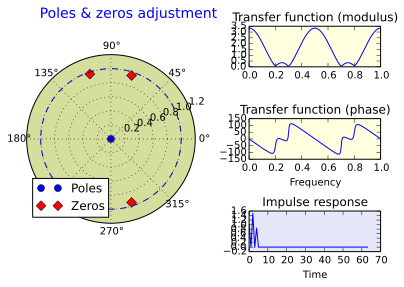

In [35]:
poles=np.array([0])
zeros=np.array([0.95*np.exp(1j*2*pi*0.2), 0.95*np.exp(-1j*2*pi*0.2), 0.97*np.exp(1j*2*pi*0.3), 0.97*np.exp(-1j*2*pi*0.3)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a 4 zeros", label="fig:doublezero2")

### Analysis of all-poles transfer functions

For an all-pole transfer function, 
$$
H(z)=\frac{1}{D(z)}
$$
we will obviously have the inverse behavior. Instead of an attenuation at a frequency close to the value given by the angle of the root, we will obtain a surtension. This is illustrated below, in the case of a single, the multiple poles.

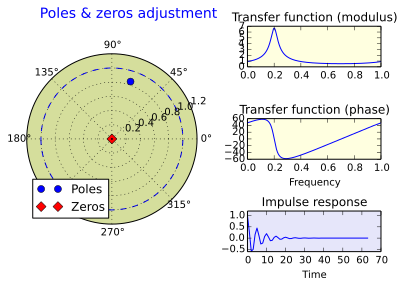

In [38]:
zeros=np.array([0])
poles=np.array([0.85*np.exp(1j*2*pi*0.2)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a single pole", label="fig:singlepole")

Furthermore, we see that 
\begin{textboxa}
the closer the pole to the unit circle, the more important the surtension
\end{textboxa}

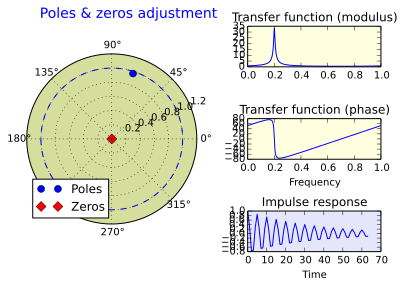

In [43]:
zeros=np.array([0])
poles=np.array([0.97*np.exp(1j*2*pi*0.2)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a single pole", label="fig:singlepole_2")

We can also remark that if the modulus of the pole becomes higher than one, then the impulse response diverges. The system is no more stable.
\begin{textboxa}
Poles with a modulus higher than one yields an instable system.
\end{textboxa}

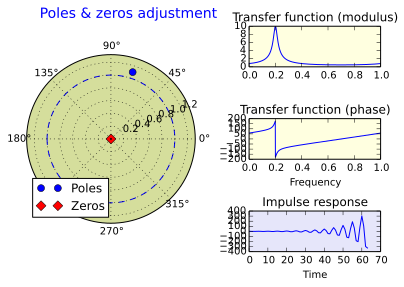

In [44]:
zeros=np.array([0])
poles=np.array([1.1*np.exp(1j*2*pi*0.2)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a single pole", label="fig:singlepole_3")

For 4 poles, we get the following: two pairs of surtensions, for frequencies essentialy given by the arguments of the poles. 

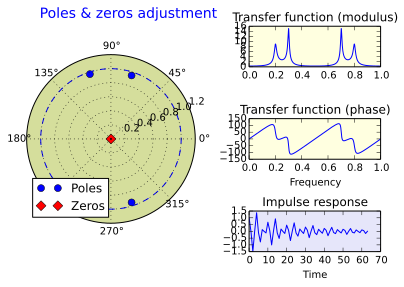

In [46]:
zeros=np.array([0])
poles=np.array([0.95*np.exp(1j*2*pi*0.2), 0.95*np.exp(-1j*2*pi*0.2), 0.97*np.exp(1j*2*pi*0.3), 0.97*np.exp(-1j*2*pi*0.3)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a 4 poles", label="fig:doublepoles2")

### General transfer functions

For a general transfer function, we will get the combination of the two effects: attenuation or even nulls that are given by the zeros, and sutensions, maxima that are yied by the poles. Here is a simple example.

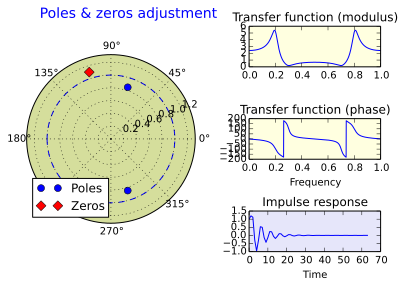

In [50]:
poles=np.array([0.85*np.exp(1j*2*pi*0.2), 0.85*np.exp(-1j*2*pi*0.2)])
zeros=np.array([1.1*np.exp(1j*2*pi*0.3), 1.1*np.exp(-1j*2*pi*0.3)])
A=ZerosPolesDisplay(poles,zeros)
figcaption("Poles-Zeros representation, Transfer function and Impulse response for a 2 poles and 2 zeros", label="fig:poleszero")

Hence we see that it is opssible to understand the behavior of transfer function by the study of the location of their poles and zeros. It is even possible to design transfer function by optimizing the placement of their poles and zeros. 

For instance, given the poles and zeros in the previous example, we immediately find the coefficients of the filter by computing the corresponding polynomials:

In [55]:
print("poles",A.poles)
print("zeros",A.zeros)

print("coeffs a:",np.poly(A.poles))
print("coeffs b:",np.poly(A.zeros))


poles [ 0.26266445+0.80839804j  0.26266445-0.80839804j]
zeros [-0.33991869+1.04616217j -0.33991869-1.04616217j]
coeffs a: [ 1.         -0.52532889  0.7225    ]
coeffs b: [ 1.          0.67983739  1.21      ]


In order to further investigate these properties and experiment with the pole and zeros placement, your servant has prepared a ZerosPolesPlay class. Enjoy!

In [1]:
%matplotlib
%run zerospolesplay.py

Using matplotlib backend: TkAgg


### Appendix -- listing of the class ZerosPolesPlay

In [63]:
%load zerospolesplay.py

In [ ]:
"""
Transfer function adjustment using zeros and poles drag and drop!
jfb 2015 - last update january 08, 2015
"""
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi


#line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance

class ZerosPolesPlay():
    
  def __init__(self,poles=np.array([0.7*np.exp(1j*2*np.pi*0.1)]),
               zeros=np.array([1.27*np.exp(1j*2*np.pi*0.3)]),
               N=1000, response_real=True, ymax=1.2, Nir=64):
               
    if response_real:
        self.poles, self.poles_isreal = self.sym_comp(poles)
        self.zeros, self.zeros_isreal = self.sym_comp(zeros)
    else:    
        self.poles=poles
        self.poles_isreal= (np.abs(np.imag(poles))<1e-12)
        self.zeros=zeros
        self.zeros_isreal =(np.abs(np.imag(zeros))<1e-12)
    
    self.ymax=np.max([ymax, 1.2*np.max(np.concatenate((np.abs(poles), np.abs(zeros))))])
    self.poles_th=np.angle(self.poles)
    self.poles_r=np.abs(self.poles)
    self.zeros_th=np.angle(self.zeros)
    self.zeros_r=np.abs(self.zeros)
    self.N=N
    self.Nir=Nir
    self.response_real=response_real
    
    self.being_dragged = None
    self.nature_dragged = None
    self.poles_line = None
    self.zeros_line = None
    self.setup_main_screen()
    self.connect()
    self.update()

    
  def setup_main_screen(self):
        
    import matplotlib.gridspec as gridspec
    
    #Poles & zeros
    self.fig = plt.figure()
    gs = gridspec.GridSpec(3,12) 
    #self.ax = self.fig.add_axes([0.1, 0.1, 0.77, 0.77], polar=True, axisbg='#d5de9c')
    #self.ax=self.fig.add_subplot(221,polar=True, axisbg='#d5de9c')
    self.ax = plt.subplot(gs[0:,0:6],polar=True,axisbg='#d5de9c')
    #self.ax = self.fig.add_subplot(111, polar=True)
    self.fig.suptitle('Poles & zeros adjustment',fontsize=18, color='blue', 
                      x=0.1, y=0.98, horizontalalignment='left')
    #self.ax.set_title('Poles & zeros adjustment',fontsize=16, color='blue')
    self.ax.set_ylim([0, self.ymax])
    self.poles_line, = self.ax.plot(self.poles_th,self.poles_r,'ob',ms=9, picker=5, label="Poles")
    self.zeros_line, = self.ax.plot(self.zeros_th,self.zeros_r,'Dr',ms=9, picker=5, label="Zeros")
    self.ax.plot(np.linspace(-np.pi,np.pi,500),np.ones(500),'--b',lw=1)
    self.ax.legend(loc=1)
    
               
    #Transfer function
    #self.figTF, self.axTF = plt.subplots(2, sharex=True)
    #self.axTF0=self.fig.add_subplot(222,axisbg='LightYellow')
    self.axTF0= plt.subplot(gs[0,6:11],axisbg='LightYellow')
    #self.axTF[0].set_axis_bgcolor('LightYellow')
    self.axTF0.set_title('Transfer function (modulus)')
    #self.axTF1=self.fig.add_subplot(224,axisbg='LightYellow')
    self.axTF1=plt.subplot(gs[1,6:11],axisbg='LightYellow')
    self.axTF1.set_title('Transfer function (phase)')
    self.axTF1.set_xlabel('Frequency')
    f=np.linspace(0,1,self.N)
    self.TF=np.fft.fft(np.poly(self.zeros),self.N)/np.fft.fft(np.poly(self.poles),self.N)
    self.TF_m_line, = self.axTF0.plot(f,np.abs(self.TF))
    self.TF_p_line, = self.axTF1.plot(f,180/np.pi*np.angle(self.TF))
    #self.figTF.canvas.draw()
    
    #Impulse response
    #self.figIR = plt.figure()
    #self.axIR = self.fig.add_subplot(223,axisbg='Lavender')
    self.axIR =  plt.subplot(gs[2,6:11],axisbg='Lavender')
    self.IR= self.impz(self.zeros,self.poles,self.Nir) #np.real(np.fft.ifft(self.TF))
    self.axIR.set_title('Impulse response')
    self.axIR.set_xlabel('Time')
    self.IR_m_line, = self.axIR.plot(self.IR)
    #self.figIR.canvas.draw()        
    self.fig.canvas.draw()
    self.fig.tight_layout()    
 
  def impz(self,zeros,poles,L):
        from scipy.signal import lfilter
        a=np.poly(poles)
        b=np.poly(zeros)
        d=np.zeros(L)
        d[0]=1
        h=lfilter(b,a,d)
        return h
    
  def sym_comp(self,p):
    L=np.size(p)
    r=list()
    c=list()
    for z in p: 
        if np.abs(np.imag(z))<1e-12: 
            r.append(z)
        else:
            c.append(z)
    out=np.concatenate((c,r,np.conjugate(c[::-1])))           
    isreal=(np.abs(np.imag(out))<1e-12)       
    return out,isreal
#sym_comp([1+1j, 2, 3-2j])

  def connect(self):
    self.cidpick = self.fig.canvas.mpl_connect(
      'pick_event', self.on_pick)
    self.cidrelease = self.fig.canvas.mpl_connect(
      'button_release_event', self.on_release)
    self.cidmotion = self.fig.canvas.mpl_connect(
      'motion_notify_event', self.on_motion)

  def update(self):  
        
    #poles and zeros
    #self.fig.canvas.draw()
    
    #Transfer function & Impulse response
    if not(self.being_dragged is None): 
        #print("Was released")

        f=np.linspace(0,1,self.N)
        self.TF=np.fft.fft(np.poly(self.zeros),self.N)/np.fft.fft(np.poly(self.poles),self.N)
        self.TF_m_line.set_ydata(np.abs(self.TF))
        M=np.max(np.abs(self.TF))
        #update the yscale
        current_ylim=self.axTF0.get_ylim()[1]
        if M>current_ylim or M<0.5*current_ylim: self.axTF0.set_ylim([0, 1.2*M])

        #phase
        self.TF_p_line.set_ydata(180/np.pi*np.angle(self.TF))
        #self.figTF.canvas.draw()
        
        # Impulse response
        self.IR=self.impz(self.zeros,self.poles,self.Nir) #np.fft.ifft(self.TF)
        #print(self.IR)
        self.IR_m_line.set_ydata(self.IR)
        M=np.max(self.IR)
        Mm=np.min(self.IR)
        #update the yscale
        current_ylim=self.axIR.get_ylim()
        update_ylim=False
        if M>current_ylim[1] or M<0.5*current_ylim[1]: update_ylim=True 
        if Mm<current_ylim[0] or np.abs(Mm)>0.5*np.abs(current_ylim[0]): update_ylim=True     
        if update_ylim: self.axIR.set_ylim([Mm, 1.2*M])
        
        #self.figIR.canvas.draw()
    self.fig.canvas.draw() 
    
    
  def on_pick(self, event):
    """When we click on the figure and hit either the line or the menu items this gets called."""
    if event.artist != self.poles_line and event.artist != self.zeros_line: 
         return
    self.being_dragged = event.ind[0]
    self.nature_dragged = event.artist


  def on_motion(self, event):
    """Move the selected points and update the graphs."""
    if event.inaxes != self.ax: return
    if self.being_dragged is None: return
    p = self.being_dragged #index of points on the line being dragged
    xd = event.xdata
    yd = event.ydata
    #print(yd)
    if self.nature_dragged==self.poles_line: 
        x,y = self.poles_line.get_data()
        if not (self.poles_isreal[p]):
            x[p],y[p]=xd,yd
        else:
            if np.pi/2<xd<3*np.pi/2:
                x[p],y[p]=np.pi,yd
            else:
                x[p],y[p]=0,yd  
        x[-p-1],y[-p-1]=-x[p],y[p]        
        self.poles_line.set_data(x,y) # then update the line
        #print(self.poles)
        self.poles[p]=y[p]*np.exp(1j*x[p])  
        self.poles[-p-1]=y[p]*np.exp(-1j*x[p])
        
    else:
        x,y = self.zeros_line.get_data()   
        if not (self.zeros_isreal[p]):
            x[p],y[p]=xd,yd
        else:
            if np.pi/2<xd<3*np.pi/2:
                x[p],y[p]=np.pi,yd
            else:
                x[p],y[p]=0,yd    
        x[-p-1],y[-p-1]=-x[p],y[p] 
        self.zeros_line.set_data(x,y) # then update the line
        self.zeros[p]=y[p]*np.exp(1j*x[p]) # then update the line
        self.zeros[-p-1]=y[p]*np.exp(-1j*x[p])    
 
    
    self.update() #and the plot

  def on_release(self, event):
    """When we release the mouse, if we were dragging a point, recompute everything."""
    if self.being_dragged is None: return

    self.being_dragged = None
    self.nature_dragged= None
    self.update()


#case of complex poles and zeros
poles=np.array([0.8*np.exp(1j*2*pi*0.125), 0.8*np.exp(1j*2*pi*0.15), 0.5])
zeros=np.array([0.95*np.exp(1j*2*pi*0.175), 1.4*np.exp(1j*2*pi*0.3), 0])
A=ZerosPolesPlay(poles,zeros)

"""
#case of a single real pole
poles=np.array([0.5])
zeros=np.array([0])
A=ZerosPolesPlay(poles,zeros,response_real=False)
"""

plt.show()


#At the end, poles and zeros available as A.poles and A.zeros


----
<div align=right> [Index](toc.ipynb) - [Back](DigitalFilters.ipynb) - [Next](FIR_synthesis.ipynb.ipynb)</div>